<a href="https://colab.research.google.com/github/akashtepan/Coronavirus_Tweet_Sentiment_Analysis_Classification/blob/main/Shubham_Tepan_Notebook_Coronavirus_Tweet_Sentiment_Analysis_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Coronavirus Tweet Sentiment Analysis**



##### **Project Type**    - Classification
##### **Contribution**    - Shubham Tepan (Individual)

# **Project Summary**

The project involves building a classification model to predict the sentiment of COVID-19 tweets. The dataset used for this task has been pulled from Twitter, and manual tagging has been done to label the tweets with their sentiment. To protect the privacy of the users, the names and usernames have been given codes. The dataset includes columns such as UserName, ScreenName, Location, TweetAt, OriginalTweet, and Sentiment. The Sentiment column is the target variable that the machine learning model will be trained to predict.

# **GitHub Link -** 

# **Problem Statement**


The problem statement for this project is to build a machine learning model that can accurately classify the sentiment of COVID-19 tweets. Given a new tweet related to COVID-19, the model should be able to predict whether the sentiment of the tweet is positive, negative, or neutral. The model will be trained on a dataset of manually labeled COVID-19 tweets pulled from Twitter. The goal is to build a model that can help to understand the overall sentiment of people on social media regarding COVID-19, which can be useful for public health researchers, policymakers, and other stakeholders.

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [1]:
# Importing Libraries
import numpy as np # library for numerical operations
import pandas as pd # library for data manipulation
import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for plotting
%matplotlib inline
import warnings; warnings.simplefilter('ignore') # suppress warnings

# Importing libraries for text preprocessing and NLP
import re # library for regular expressions
import nltk # natural language processing toolkit
nltk.download('stopwords') # download stop words corpus
nltk.download('wordnet') # download wordnet corpus
from nltk.stem.snowball import SnowballStemmer # import snowball stemmer from nltk
from nltk.corpus import stopwords # import stopwords corpus from nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Dataset Loading

In [2]:
# Import the drive module from the google.colab library
from google.colab import drive

# Mount the drive onto the '/content/drive' directory
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the CSV file from the given path in Google Drive
# use the ISO-8859-1 encoding to handle any special characters in the text data
tweet_df = pd.read_csv('/content/drive/MyDrive/Coronavirus Tweets.csv', encoding="ISO-8859-1")


### Dataset First View

In [4]:
# Displaying the first 5 rows of the dataset
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [5]:
# Finding the number of rows and columns in the dataset
rows, columns = tweet_df.shape

# Printing the number of rows and columns in the dataset
print('The dataset has', rows, 'rows and', columns, 'columns.')

The dataset has 41157 rows and 6 columns.


### Dataset Information

In [6]:
# Getting information about the dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


### What did you know about your dataset?

* The dataset contains 41157 rows and 6 columns.

* The columns are named 'UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', and 'Sentiment'.

* The 'UserName' and 'ScreenName' columns are of integer data type and the 'Location', 'TweetAt', 'OriginalTweet', and 'Sentiment' columns are of object data type.

* The 'Location' column has some missing values as the non-null count is less than the total number of rows.

* The 'OriginalTweet' column contains the actual text of the tweet.

* The 'Sentiment' column is the target variable which needs to be predicted using a classification model. It indicates the sentiment of the tweet and can have one of three possible values: 'Positive', 'Negative', or 'Neutral'.

* The dataset contains tweets related to COVID-19 and has been manually tagged with their sentiment.

## ***Understanding Your Variables***

In [7]:
# generate statistical summary of all columns in the DataFrame, including numeric and non-numeric columns
# using the describe() method with the include parameter set to 'all'
tweet_df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [8]:
# Storing the column names of the dataset in a variable
columns = tweet_df.columns

# Printing the column names
print('Column Names:')
print(columns)

Column Names:
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


### Variables Description 

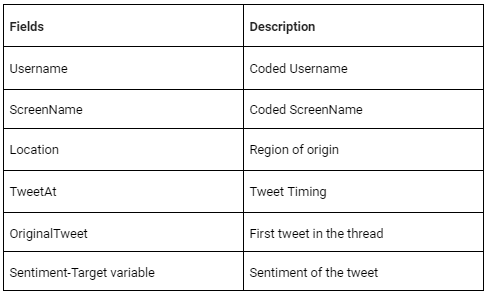

### Check Unique Values for each variable.

In [9]:
# Iterate over all columns in the dataset and print the number of unique values in each column
for i in tweet_df.columns:
  print("Total Unique Values in", i, "-", len(tweet_df[i].unique()))

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12221
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


### Handling Missing Values

In [10]:
# Missing values
def missing_percentage(tweet_df):
    """This function takes a DataFrame(tweet_df) as input and returns two columns, total missing values and total missing values percentage"""
    total = tweet_df.isnull().sum().sort_values(ascending = False)
    percent = round(tweet_df.isnull().sum()/len(tweet_df)*100,2).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# Missing value percentage 
print(missing_percentage(tweet_df))

               Total  Percent
Location        8590    20.87
UserName           0     0.00
ScreenName         0     0.00
TweetAt            0     0.00
OriginalTweet      0     0.00
Sentiment          0     0.00


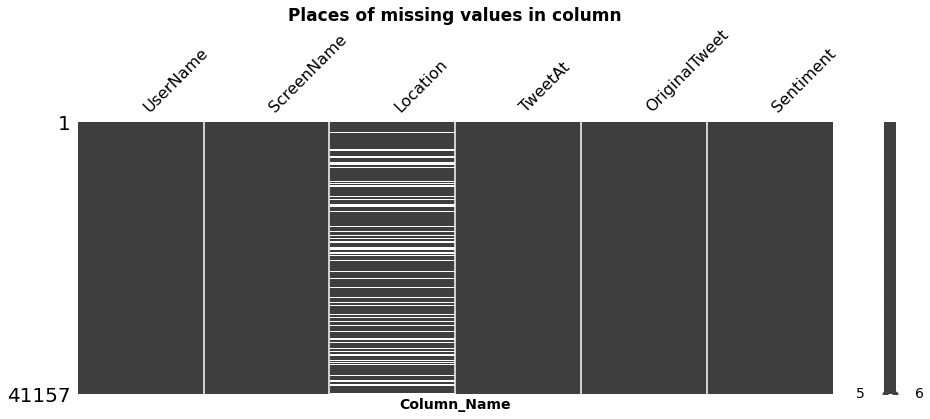

In [11]:
# Import the missingno library
import missingno as msno

# Generate a matrix plot of the missing values in the DataFrame
msno.matrix(tweet_df, figsize=(15, 5))
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

* The specific chart used is a matrix plot of the missing values in the DataFrame. The chart was chosen by the me to visualize the missing values in the dataset.

* The chart shows that missing values are only present in the 'Location' column, and they make up approximately 20.87% of the total number of rows in the dataset.


# **EDA**

## **Important Columns**
- Location: geographic location associated with the tweet
- TweetAt: time when the tweet was posted
- Sentiment: sentiment of the tweet
- OriginalTweet: original text of the tweet

# **Location**

In [12]:
# generate a count of unique values in the 'Location' column of the DataFrame
# using the value_counts() method
# then show the top 10 locations with the highest counts using the head() method
tweet_df.Location.value_counts().head(15)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Name: Location, dtype: int64

In [13]:
# describe the 'Location' column of the DataFrame using the describe() method
tweet_df.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

# **Top 15 Locations**

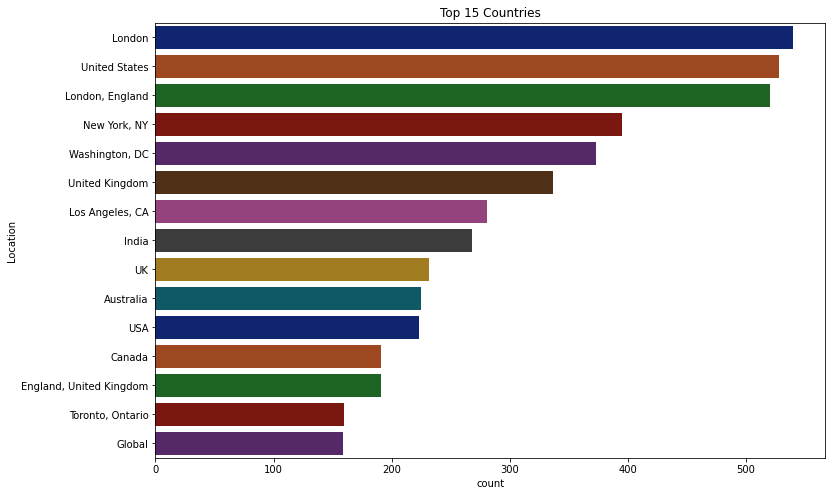

In [14]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the countplot
sns.countplot(y=tweet_df.Location, 
              order=tweet_df.Location.value_counts().iloc[:15].index, 
              palette='dark')

# Set the chart title
plt.title('Top 15 Countries')

# Display the chart
plt.show()

1. I picked a countplot because it shows the count of tweets for each location in a bar chart format, making it easy to compare the number of tweets between different locations. Additionally, by using an ordered countplot, I was able to focus on the top 15 countries with the most tweets.

2. From the chart, it is clear that the London has the highest number of COVID-19 related tweets, followed by the United States. 

3. The gained insights from the chart may help businesses and organizations understand the global sentiment around COVID-19 and tailor their responses accordingly. For example, if a business has a significant presence in the United States or the United Kingdom, they may want to pay closer attention to the sentiment in those countries and adjust their messaging or operations accordingly. 

In [15]:
# Create a new DataFrame 'location' to count the frequency of each location value in the 'Location' column of 'tweet_df'
location = pd.DataFrame(tweet_df['Location'].value_counts().sort_values(ascending=False))

# Rename the column containing the count to 'count'
location = location.rename(columns={'Location':'count'})

In [16]:
# Importing the required library Plotly to create interactive graphs and visualizations
import plotly.graph_objects as go # Importing the library with the alias name 'go'
!pip install plotly --upgrade
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [17]:
# Select the top 15 locations by count
top_locations = location.nlargest(15, 'count')

# Define the data for the pie chart
data = go.Pie(
    labels=top_locations.index,
    values=top_locations['count'],
    hoverinfo="label+percent",
    hole=0.4,
    marker=dict(colors=px.colors.qualitative.Pastel)
)

# Define the layout of the chart
layout = go.Layout(
    title="<b>Percentage of Top 15 Locations</b>",
    title_x=0.5,
    legend=dict(x=0.1, y=1.0, orientation="v")
)

# Create the figure and show it
fig = go.Figure(data=[data], layout=layout)
fig.show()

1. I picked the specific chart because it displays the percentage of the top 15 locations in a visually appealing and easy-to-understand way. A pie chart is a good choice for showing the proportion of different categories in a dataset.

2. The insights found from the chart are that London has the highest percentage share of 11.7%, followed by the United States with 11.4% and London, England with 11.2%. India is placed at the 8th spot and holds a percentage of 5.8%.

3. The gained insights can help create a positive business impact by providing information about where the majority of tweets in the dataset are coming from, which can be useful for companies looking to target specific markets or audiences. 

# **Tweet Date**

In [18]:
# Count the occurrences of each unique value in the 'TweetAt' column of tweet_df
# and return the counts in descending order
tweet_df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [19]:
# Get the unique values in the 'TweetAt' column of tweet_df
tweet_df.TweetAt.unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [20]:
# Call the 'describe' method on the 'TweetAt' column of tweet_df
# to generate a summary of the column's values
tweet_df.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

In [21]:
# Create a countplot of the 'TweetAt' column in 'tweet_df'
fig = px.histogram(
    tweet_df,
    x='TweetAt',
    nbins=len(tweet_df['TweetAt'].unique()),
    color_discrete_sequence=px.colors.qualitative.Dark2,
    title='<b>Distribution of Tweeting Dates</b>',
    labels={'TweetAt': 'Tweeting Date', 'count': 'Count'}
)

# Rotate the x-axis labels
fig.update_xaxes(tickangle=-45)

# Show the plot
fig.show()

1. The histogram chart is used to display the distribution of a continuous variable. In this case, we are displaying the distribution of tweeting dates in the TweetAt column of the tweet_df dataframe.

2. The tweeting period spanned from 16th March to 14th April, lasting a period of 30 days. Out of all the dates, 20th March had the highest frequency of tweets, while the least frequency was on 28th March.

3. The gained insights may help create a positive business impact by providing information about the popularity of the tweets based on their tweeting dates. This information can be used by businesses to analyze the trends and patterns of user engagement on social media, and adjust their marketing strategies accordingly. 

# **Sentiment**

In [22]:
# Get an array of the unique values in the 'Sentiment' column of 'tweet_df'
tweet_df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [23]:
# Call the 'describe' method on the 'Sentiment' column of 'tweet_df'
# to generate a summary of the column's values
tweet_df.Sentiment.describe()

count        41157
unique           5
top       Positive
freq         11422
Name: Sentiment, dtype: object

In [24]:
# Count the occurrences of each unique value in the 'Sentiment' column of tweet_df
# and return the counts in descending order
tweet_df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

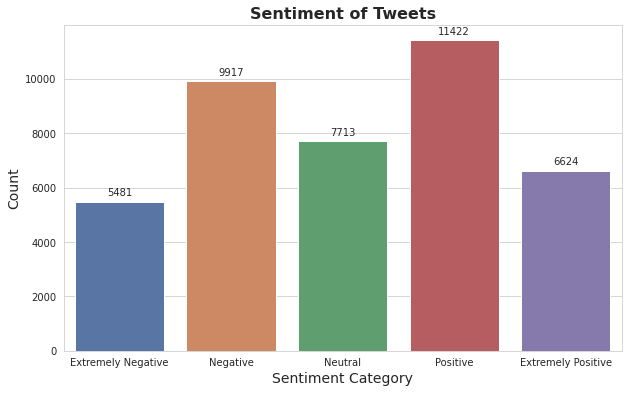

In [25]:
# Define a color palette using the 'color_palette' function from seaborn
colors = sns.color_palette('deep', n_colors=5)

# Set the figure size and style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Create a countplot of the 'Sentiment' column in 'tweet_df'
# in order from most negative to most positive sentiment
sentiment_plot = sns.countplot(x='Sentiment', data=tweet_df, 
                               order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], 
                               palette=colors)

# Add annotations to the plot indicating the count of tweets for each sentiment category
for p in sentiment_plot.patches:
    sentiment_plot.annotate(format(p.get_height(), '.0f'), 
                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                             ha = 'center', va = 'center', xytext = (0,9), 
                             textcoords = 'offset points')

# Set the title and axis labels
plt.title("Sentiment of Tweets", fontsize=16, fontweight='bold')
plt.xlabel("Sentiment Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()

1. The specific chart was chosen because it effectively visualizes the distribution of tweet sentiment categories in a clear and concise manner.

2. The plot above shows the frequency of different sentiments present in the dataset. Positive sentiment has the highest occurrence, followed by negative, neutral, extremely positive and extremely negative sentiments.

3. The gained insights can potentially help create a positive business impact by providing a better understanding of how customers are feeling and responding to a brand or product. For example, a business could use this information to improve customer service and address any negative sentiment that may be impacting customer satisfaction. 

# **Class Distribution of Each Sentiment**

In [26]:
# Create a copy of the 'tweet_df' dataframe and assign it to the variable 'tt_df'
tt_df = tweet_df.copy()

In [27]:
# We are creating a new column called 'text' in the tt_df dataframe, which will contain the same values as the 'OriginalTweet' column.
tt_df['text'] = tt_df.OriginalTweet

# The 'astype' method is used to cast the values in the 'text' column as strings, to ensure they are all of the same data type.
# We pass the 'str' argument to specify that the values should be cast as strings.
tt_df["text"] = tt_df["text"].astype(str)

In [28]:
# Group the data by 'Sentiment', count the 'text' values in each group, and sort the results in descending order.
class_df = tt_df.groupby('Sentiment').count()['text'].sort_values(ascending=False)

# Reset the index of the DataFrame to start from 0.
class_df = class_df.reset_index()

# Apply a background gradient to the sorted DataFrame.
class_df.style.background_gradient(cmap='viridis')

,Sentiment,text
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


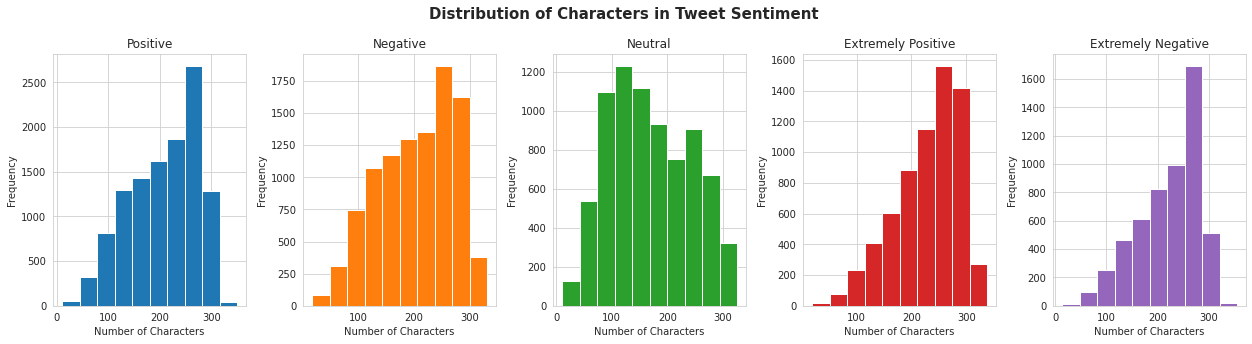

In [29]:
import matplotlib.pyplot as plt

# Define the list of sentiment types
sentiments = ['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']

# Create a figure with subplots for each sentiment type
fig, axs = plt.subplots(1, len(sentiments), figsize=(18, 5))

# Loop through the sentiment types and plot the histogram for each sentiment type
for i, sentiment in enumerate(sentiments):
    # Select the tweet texts with the current sentiment type
    tweet_texts = tt_df[tt_df['Sentiment'] == sentiment]['text']
    # Calculate the length of each tweet text
    tweet_lengths = [len(text) for text in tweet_texts]
    # Plot the histogram for the current sentiment type
    axs[i].hist(tweet_lengths, color='C{}'.format(i))
    axs[i].set_title(sentiment)
    axs[i].set_xlabel('Number of Characters')
    axs[i].set_ylabel('Frequency')

# Add a title to the figure
fig.suptitle('Distribution of Characters in Tweet Sentiment', size=15, fontweight='bold')

# Adjust the spacing between subplots and the margins of the figure
plt.subplots_adjust(wspace=0.3, left=0.06, right=0.98, top=0.85, bottom=0.15)

# Show the plot
plt.show()

The chart is a good choice to display the distribution of characters in tweet sentiment, as it shows the frequency of tweet text lengths for different sentiment types in a clear and easy-to-understand way. The use of subplots and different colors for each sentiment type allows for easy comparison between sentiment types.


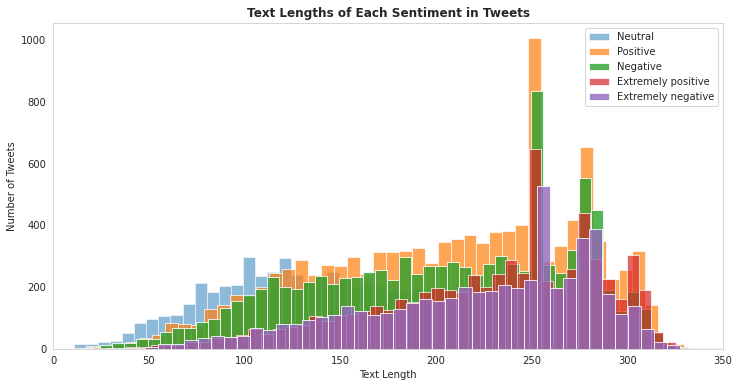

In [30]:
# Writing the function to calculate the length of text
def length(text):    
    '''A function which returns the length of text'''
    return len(text)

# Applying the length function to each row in the 'text' column and storing the results in a new column called 'length'
tt_df['length'] = tt_df['text'].apply(length)

# Setting the figure size
plt.rcParams['figure.figsize'] = (12, 6)

# Setting the number of bins for the histograms
bins = 50

# Plotting the histograms for each sentiment type
plt.hist(tt_df[tt_df['Sentiment'] == "Neutral"]['length'], alpha=0.5, bins=bins, label='Neutral')
plt.hist(tt_df[tt_df['Sentiment'] == "Positive"]['length'], alpha=0.7, bins=bins, label='Positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Negative"]['length'], alpha=0.8, bins=bins, label='Negative')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Positive"]['length'], alpha=0.7, bins=bins, label='Extremely positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Negative"]['length'], alpha=0.8, bins=bins, label='Extremely negative')

# Setting the plot title, x and y labels, legend, and axis limits
plt.title('Text Lengths of Each Sentiment in Tweets', fontweight='bold')
plt.xlabel('Text Length')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper right')
plt.xlim(0, 350)
plt.grid()

# Displaying the plot
plt.show()

A histogram was used to visualize the distribution of tweet lengths for each sentiment type. 


# **The average length of words in a tweet.**

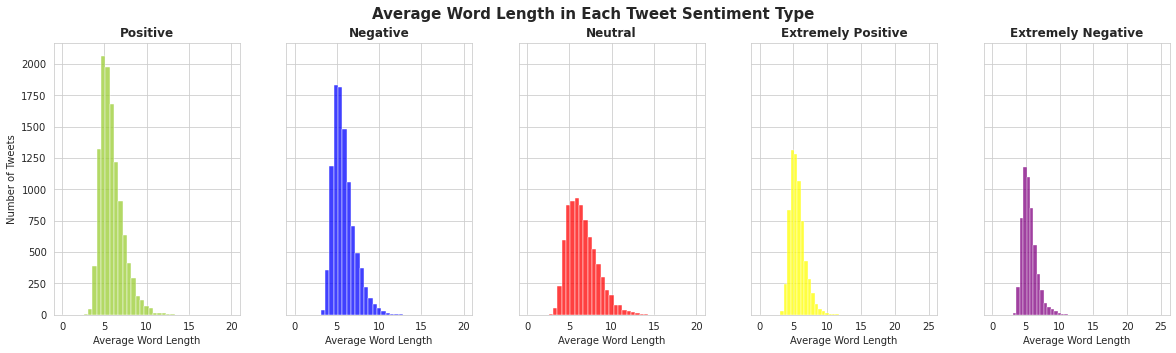

In [31]:
# Creating a function to calculate the average word length in a text
def avg_word_len(text):
    # Splitting the text into words
    words = text.split()
    # Calculating the length of each word
    word_lens = [len(word) for word in words]
    # Calculating the average word length
    if len(word_lens) == 0:
        return 0
    else:
        return np.mean(word_lens)

# Adding a new column to the dataframe with the average word length for each tweet
tt_df['avg_word_len'] = tt_df['text'].apply(avg_word_len)

# Defining the colors for each sentiment type
colors = {'Positive': 'yellowgreen', 
          'Negative': 'blue', 
          'Neutral': 'red', 
          'Extremely Positive': 'yellow', 
          'Extremely Negative': 'purple'}

# Defining the bin sizes for each sentiment type
bins = {'Positive': np.linspace(0, 20, 40), 
        'Negative': np.linspace(0, 20, 40), 
        'Neutral': np.linspace(0, 20, 40), 
        'Extremely Positive': np.linspace(0, 25, 50), 
        'Extremely Negative': np.linspace(0, 25, 50)}

# Creating subplots for each sentiment type
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Plotting the histograms for each sentiment type
for i, (sentiment, color) in enumerate(colors.items()):
    sns.histplot(tt_df[tt_df['Sentiment'] == sentiment]['avg_word_len'], ax=axes[i], color=color, bins=bins[sentiment], kde=False)
    axes[i].set_title(sentiment, fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Average Word Length', fontsize=10)
    if i == 0:
        axes[i].set_ylabel('Number of Tweets', fontsize=10)

# Setting the overall plot title
fig.suptitle('Average Word Length in Each Tweet Sentiment Type', fontweight='bold', fontsize=15)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.25)

# Displaying the plot
plt.show()

1. The chart displays histograms for the average word length in each tweet sentiment type. 

2. The chart shows that the distribution of average word length varies by tweet sentiment type. Tweets with a positive sentiment tend to have longer average word lengths, while tweets with a neutral sentiment tend to have shorter average word lengths.

3. The gained insights can help businesses tailor their communication to better match customer sentiment. For example, if a business sees that neutral sentiment tweets have shorter average word lengths, they may want to focus on concise, straightforward communication in their responses to those tweets. 





# **Examining the relationship between the dates of tweets and the sentiments associated with them.**

In [32]:
pip install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21069 sha256=a7cb324ae4e0dfaaaaa2d2e8ef8d40d4a8b90abcda1a63d85ff76992863f061f
  Stored in directory: /root/.cache/pip/wheels/b1/98/ff/4885c231adf3d185efdc38cf8aa2527f1b255ca714a43cb125
Successfully built mplcursors


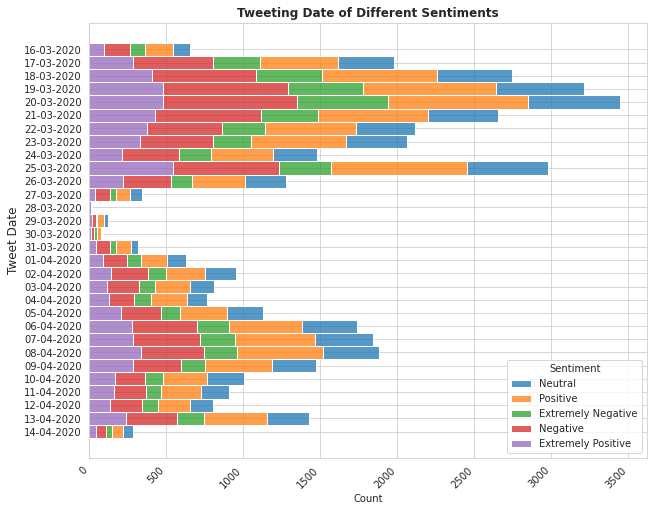

In [33]:
# set figure size for better visualization
plt.figure(figsize=(10,8))

# create stacked histogram of tweet dates with different sentiments
sns.histplot(data=tweet_df, y="TweetAt", hue="Sentiment", multiple="stack")

# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# set title and axis labels
plt.title("Tweeting Date of Different Sentiments", fontweight='bold')
plt.ylabel("Tweet Date", fontsize=12)

# display the plot
plt.show()

1. I chose a stacked histogram because it allows for the visualization of the frequency of each sentiment type by date. The stacked layout helps to easily compare the relative frequencies of each sentiment on each date.

2. The plot above shows the distribution of different sentiments by tweet date (TweetAt column). 

* It can be observed that the highest number of tweets were posted in the month of March 2020, when compared to April. 

* This period is especially notable due to the outbreak of COVID-19 cases from the month of March, which has caused fear and panic among many worldwide. 

* On 20 March 2020, the maximum number of tweets occurred, with positive sentiment being the most dominant, followed by negative sentiment. 

* On 25 March 2020, tweets with an extremely positive sentiment were most commonly posted, while those with an extremely negative sentiment were most prevalent on 20 March 2020. 

* The date of 28 March 2020 had the least number of tweets, as shown in the plot, with a corresponding low sentiment score.

# **Punctuations Available in Sentiments**

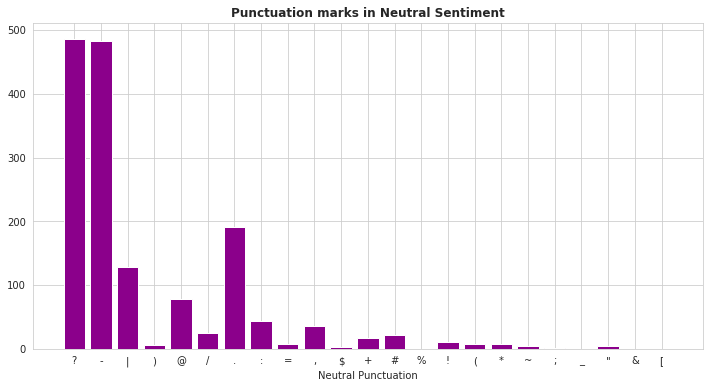

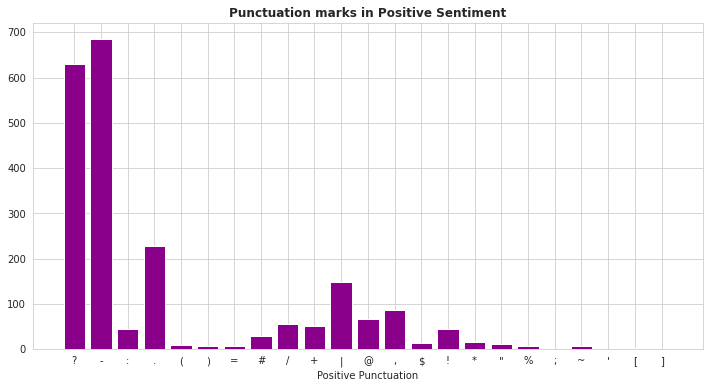

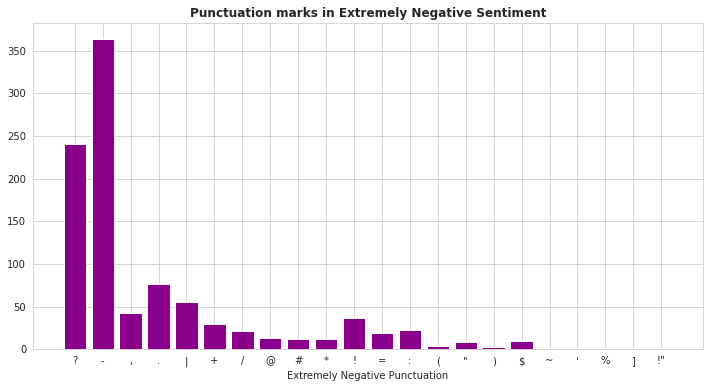

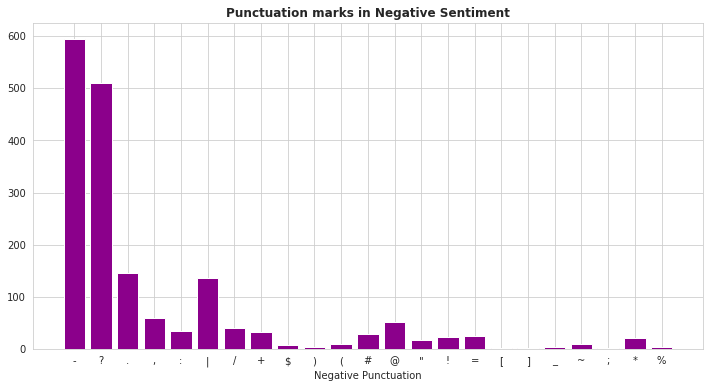

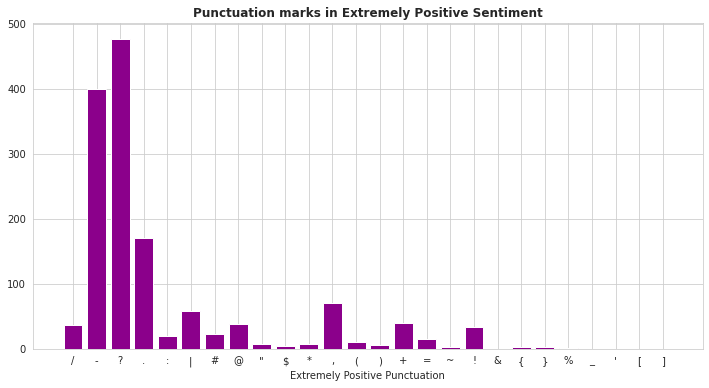

In [34]:
# Importing the required library
from collections import defaultdict
import string

# Define a function to create the corpus for a given sentiment
def create_corpus(sentiment):
    corpus=[]
    for x in tt_df[tt_df['Sentiment'] == sentiment]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

# Define a function to plot the punctuation marks for a given sentiment
def plot_punctuation(sentiment):
    corpus = create_corpus(sentiment)
    dic = defaultdict(int)
    special = string.punctuation
    for i in corpus:
        if i in special:
            dic[i] += 1
    x,y = zip(*dic.items())
    plt.bar(x, y, color='darkmagenta')
    plt.xlabel(f"{sentiment} Punctuation")
    plt.title(f"Punctuation marks in {sentiment} Sentiment", fontweight='bold')
    plt.show()

# Plot the punctuation marks for each sentiment
for sentiment in tt_df['Sentiment'].unique():
    plot_punctuation(sentiment)

The chart chosen is a bar chart, specifically a vertical bar chart, to display the frequency of each punctuation mark used in tweets for each sentiment. It is an appropriate choice because it effectively shows the differences in punctuation usage between the different sentiment types.

# **Tweets contain Mentions.**

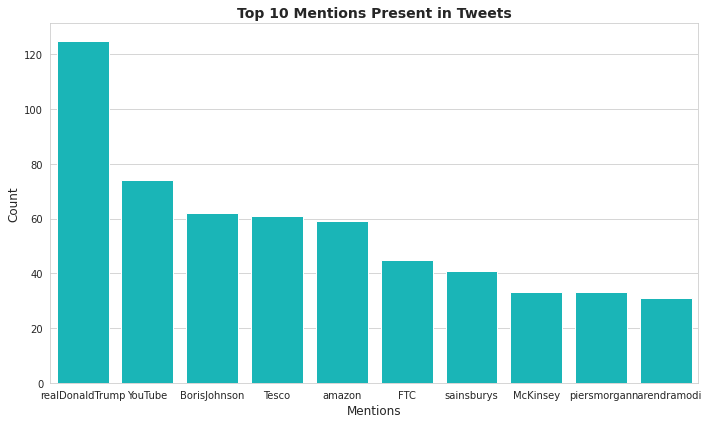

In [35]:
# Define a function to extract mentions from a text
def mentions(text):
    # Find all words in the input string that start with "@"
    line = re.findall(r'(?<=@)\w+', text)
    # Join the words together with spaces and return as a single string
    return " ".join(line)

# Create a new column in the dataset containing the mentions present in each tweet
tt_df['mentions'] = tt_df['text'].apply(lambda x: mentions(x))

# Count the occurrences of each mention and create a new dataframe with the top 10 mentions and their counts
temp = tt_df['mentions'].value_counts()[1:11].to_frame().reset_index().rename(columns={'index': 'Mentions', 'mentions': 'Count'})

# Create a bar plot showing the top 10 mentions and their counts
plt.figure(figsize=(10, 6)) # Set the size of the plot
sns.barplot(x="Mentions", y="Count", data=temp, color='darkturquoise') # Create the plot
plt.title("Top 10 Mentions Present in Tweets", fontweight='bold', fontsize=14) # Set the title
plt.xlabel("Mentions", fontsize=12) # Set the x-axis label
plt.ylabel("Count", fontsize=12) # Set the y-axis label
plt.tick_params(labelsize=10) # Set the font size of the tick labels
plt.tight_layout() # Adjust the layout to prevent overlap of plot elements
plt.show() # Display the plot

1. I picked a bar chart because it is an effective way to display categorical data with discrete values, which is what we have in this case with the top 10 mentions present in tweets.

2. The chart shows that the top 10 mentions present in tweets are 'realDonaldTrump', 'YouTube', 'BorisJohnson', 'Tesco', 'amazon', 'FTC', 'sainsburys', 'McKinsey', 'piersmorgan' and 'narendramodi'. 

3. The gained insights can help businesses to understand the most commonly discussed entities or users on Twitter and to potentially leverage this information for marketing or outreach purposes.

In [36]:
# Get top 10 mentions
b = tt_df['mentions'].value_counts()[:][1:11].index.tolist()
a = tt_df['mentions'].value_counts()[:][1:11].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a

# Set color palette
colors = px.colors.qualitative.Dark2

# Plot treemap
fig = px.treemap(row, path= ["scenario"], values="Percentage",
                 title='<b>Mentions<b>', width=1200, height=600,
                 color_discrete_sequence=colors)

# Set layout parameters
fig.update_layout(
    margin=dict(t=50, l=10, r=10, b=10),
    title={
        'font': {'size': 28},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font=dict(size=16),
    uniformtext=dict(minsize=16, mode='hide'),
    treemapcolorway=colors
)

fig.show()

1. I chose a treemap to visualize the top 10 mentions present in tweets because it is a space-efficient way of displaying hierarchical data. It is helpful for comparing the relative size of the different mentions.

2. The chart shows that the top 10 mentions present in tweets are 'realDonaldTrump', 'YouTube', 'BorisJohnson', 'Tesco', 'amazon', 'FTC', 'sainsburys', 'McKinsey', 'piersmorgan' and 'narendramodi'. This indicates that the majority of tweets are related to current affairs and high-profile individuals.

# **Length of OriginalTweet**

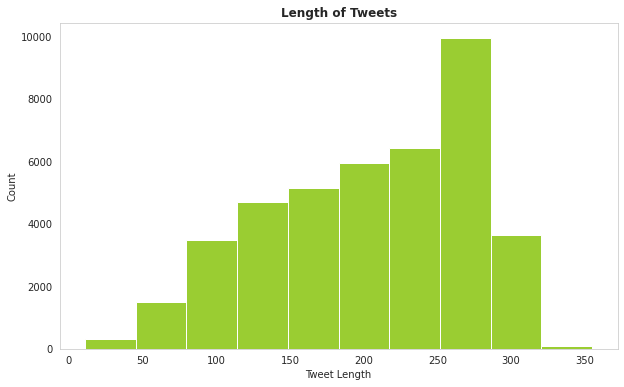

In [37]:
0# Set figure size
plt.figure(figsize=(10, 6))

# Add grid to plot
plt.grid()

# Plot histogram of tweet lengths using the 'str.len()' method of the pandas Series object
# This method returns the length of each string in the Series
plt.hist(tweet_df['OriginalTweet'].str.len(), color='yellowgreen')

# Add y-axis label
plt.ylabel('Count')

# Add x-axis label
plt.xlabel('Tweet Length')

# Add title to plot
plt.title('Length of Tweets', fontweight='bold')

# Show the plot
plt.show()

1. I chose a histogram because it is an effective way to visualize the distribution of a numerical variable.

2. The chart shows that most of the tweets are between 150 and arround 280 characters in length. 

## **Textual Data Preprocessing**

In [38]:
# create a copy of the original tweet_df DataFrame and store it in a new variable called twt_df
twt_df = tweet_df.copy()

### Remove @person character

In [40]:
# Define the remove_pattern function (as shown in the previous example)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Create a new column called "Clean_tweet" by applying the remove_pattern function to the "OriginalTweet" column
twt_df['Clean_tweet'] = np.vectorize(remove_pattern)(twt_df['OriginalTweet'], '@[\w]*')

# Display the first few rows of the DataFrame
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


### Removing URLs from text data

In [41]:
# Use a lambda function with the "apply" method to split each text string by URLs and keep only the first part
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

# Display the first few rows of the DataFrame
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


### Removing special characters, numbers, and punctuations

In [42]:
# Use the "str.replace" method to replace any non-alphabetic characters, non-numeric characters, and non-hashtag symbols with a space
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')

# Display the first few rows of the DataFrame
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COVI...


### Removing Short Words from Tweets

In [43]:
# Use the "str.replace" method with a regular expression to remove any words that are shorter than three characters
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].str.replace(r'\b\w{1,2}\b', '')

# Display the first few rows of the DataFrame
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during the #COVID outbre...


### Converting all words to lowercase and removing stopwords

In [51]:
# Define a function to remove stopwords
def remove_stopwords(text):
    '''Function to remove stopwords'''
    # Import the stopwords from nltk library
    sw = stopwords.words('english')

    # Convert the text to lowercase and remove stopwords
    text = [word.lower() for word in text.split() if word.lower() not in sw]

    # Join the list of words with space separator 
    return " ".join(text)

# Apply the remove_stopwords function to the 'Clean_tweet' column of twt_df
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(remove_stopwords)

# Display the top 5 rows of the dataframe after removing stopwords
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket #covid outbreak paranoid foo...


### Stemming using SnowballStemmer

In [52]:
# Creating an object of SnowballStemmer
stemmer = SnowballStemmer("english")

# Defining a function to apply stemming to each word in the given text
def stemming(text):    
    '''A function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

# Applying stemming to the 'Clean_tweet' column of twt_df
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(stemming)

# Displaying the top 5 rows after stemming
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elder dis...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas panic enough food e...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi supermarket #covid outbreak paranoid foo...


## **Generating a Story from Twitter Posts**